# Import the packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers
from keras.callbacks import LearningRateScheduler
from keras import regularizers
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Split the Data

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:

X = train_df.drop(['species'], axis=1)
y = train_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (792, 193)
y_train shape: (792,)
X_test shape: (198, 193)
y_test shape: (198,)


# Label Encoding

In [5]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print("y_train_encoded shape:", y_train_encoded)
print("y_test_encoded shape:", y_test_encoded)


y_train_encoded shape: [25 63 17 67  1 29 64 59 72 43 85 62 10 56 12 79 20 80  8 70 83  3 83 26
 65 18 46 31 50 56 81 53 71 66 74 95 20 87 91 18 67 27 23 16 37 42 60 97
 15 19 58 43 57  3 49 55 10 60 61 42 48 48 33 96 16 37 30 74 89 76 96 43
  4  1 32 31 77 36 45 20 74 76 91 90 90 35 11 69 40 51 49 26 38  8 47 12
 95 57 12 38 38 52 63 12 80 51 12 24 31 31 85 78 71 60  7 89 19 18 38 42
 47 79  4 89 54 19 62 33 60 22 33 15 39 28 88 21 24 79 82 55 14 96 47 67
 94 84 65 26 42 10 75 23 92 25 58 48 27 72 96 76  0 73  3 12  7 58 17 16
 84 59  6 43 61 71 84 65  5 15  7 89 93 39 87 84  2 76 55 64 90 51 11 54
 34 94 83  6 13 83 34 61 23 26 34 56 85 66 30 25 20 75 93 71  8 92 12 12
 43 73 77 29 68 92 54 78 24 22 35 14 31 27  9 16 94 30  7 15 79 64  7 53
 19 12 14 20 39 28 58 79 76 89 40 61 97 77 69 56 73 37 63 92 70 73 48 88
 91 68 79 39 31 38 69 71  7 88 67 88 66 88 16 76  1 82 59 11 89 95 66 94
  5 96 55 81 74 72 66 75 66 47 36 50  3 72 86 83 64 91  9  9 82 66 51  9
 81 70 94 72 81 20 15 55 51 

# Phase 2

## Load the needed files

Create image file path and labels using a for loop

In [17]:
image_id = train_df["id"].astype(str) + ".jpg"
image_path = []

for img_name in image_id:
    path = os.path.join('images1', img_name)
    image_path.append(path)

print(image_path[1])

Y_train_species = train_df["species"]

images1\2.jpg


## Load and preprocess images function

Function to preprocess a single image

* Images are represented as arrays with three dimensions
* For example, a colored image might have shape (height, width, 3) where the last dimension (3) corresponds to the three color channels (red, green, blue).

* Since this is a grayscale image then it'll be only 1 channel (height, width, 1)

In [18]:
def original_to_expanded(path, target_size):
    original_image = Image.open(path)
    img = Image.open(path).resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize pixels
    expanded_img_array = np.expand_dims(img_array, axis=-1)  # Add channel
    
    # Print information about the processed image
    print("Original Image Shape:", np.array(original_image).shape)
    print("Expanded Image Shape:", expanded_img_array.shape)
    
    return expanded_img_array  # Add channel dimension

In [19]:
def process_images(image_paths, target_size):
    return np.array([original_to_expanded(path, target_size) for path in image_paths])

In [20]:
X_train_images = process_images(image_path, (256,256))

Original Image Shape: (467, 526)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (251, 667)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (456, 691)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (466, 505)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (331, 771)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (449, 825)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (363, 858)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (766, 938)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (324, 726)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (275, 1101)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (370, 720)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (462, 806)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (355, 734)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (398, 727)
Expanded Image Shape: (256, 256, 1)
Original Image Shape: (330, 205)


## Split the Images

Split the images to 80% training and 20% testing

In [21]:
X_train_images, X_test_images, y_train_labels, y_test_labels = train_test_split(
    X_train_images, Y_train_species, test_size=0.2, random_state=123
)
print("X_train_images shape:", X_train_images.shape)
print("X_test_images shape:", X_test_images.shape)
print("y_train_labels shape:", y_train_labels.shape)
print("y_test_labels shape:", y_test_labels.shape)


X_train_images shape: (792, 256, 256, 1)
X_test_images shape: (198, 256, 256, 1)
y_train_labels shape: (792,)
y_test_labels shape: (198,)


Display sample of test and train images

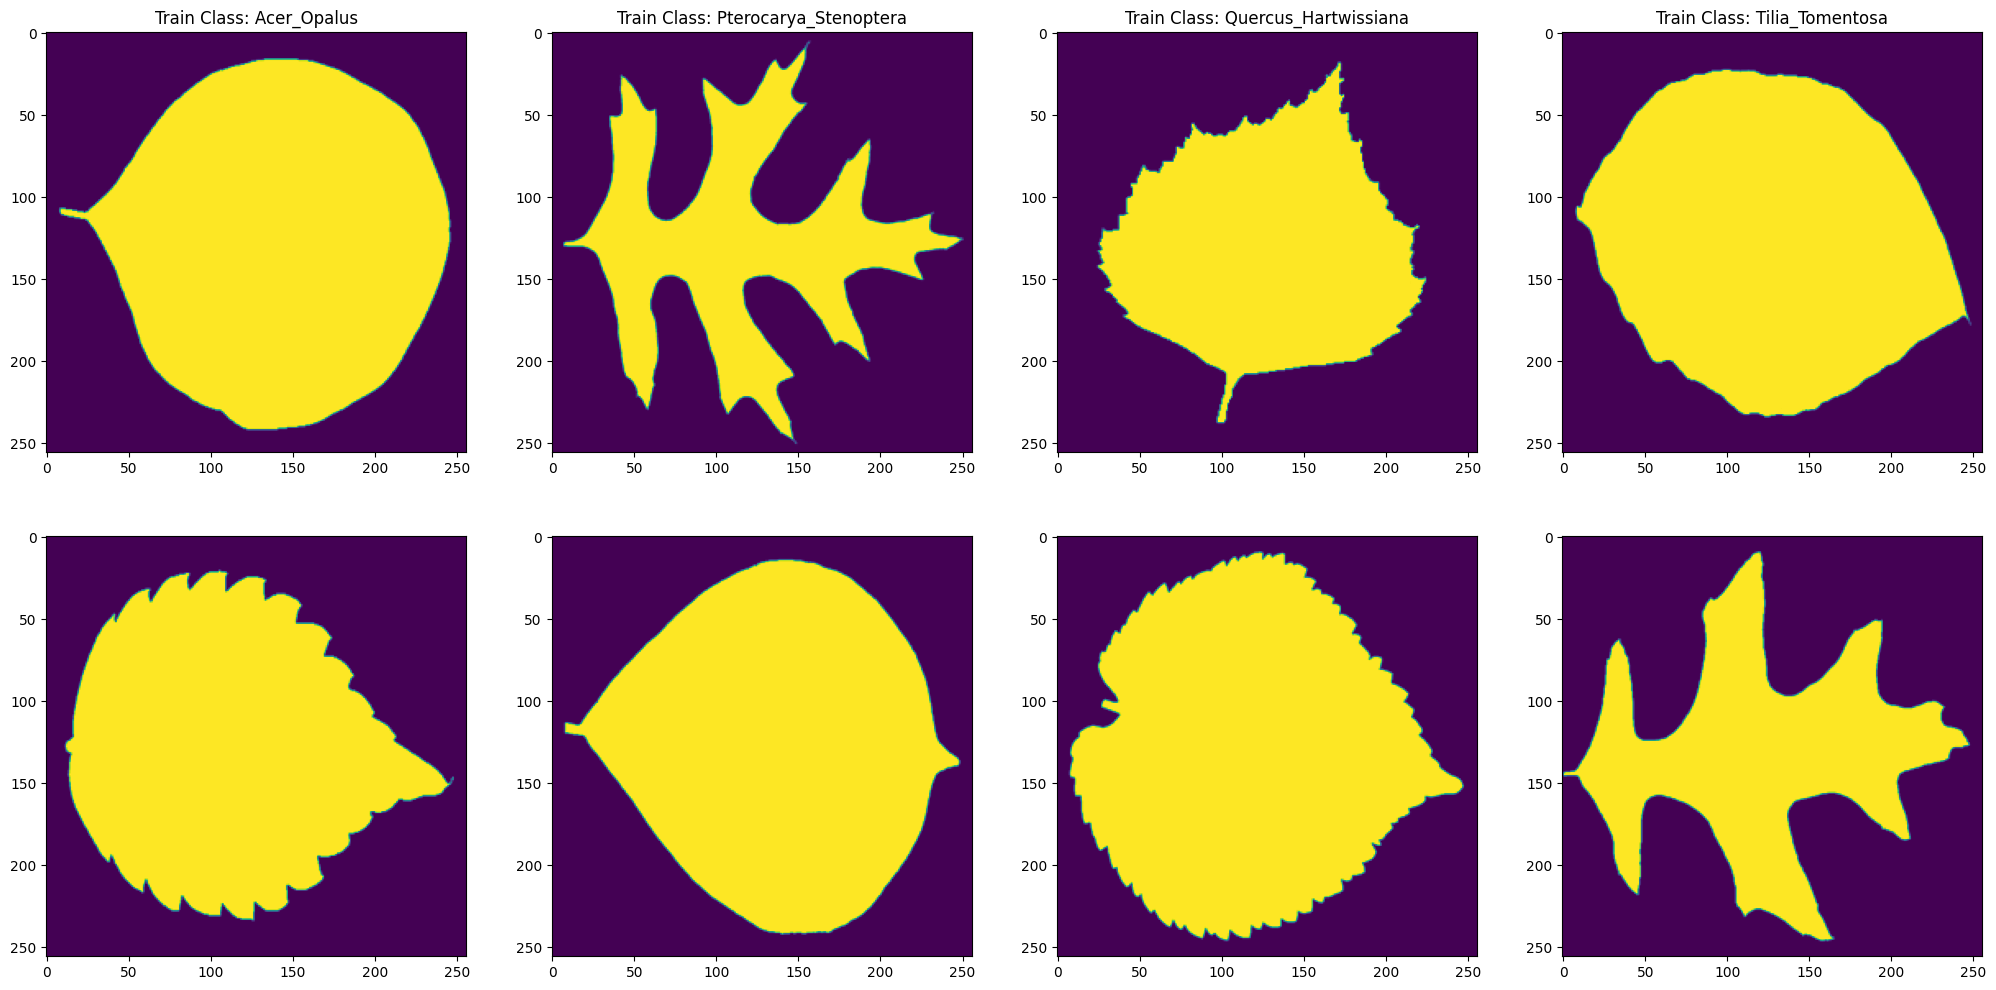

In [11]:
# Create a plot with two rows of subplots
fig, axes = plt.subplots(2, 4, figsize=(25, 12))  # Adjust figsize as needed

# Display the first 4 training images
for i in range(4):
    axes[0, i].imshow(X_train_images[i])
    axes[0, i].set_title(f"Train Class: {y_train_labels[i]}")
    #axes[0, i].axis('off')  # Turn off axis labels for clarity

# Display the first 4 testing images
for i in range(4):
    axes[1, i].imshow(X_test_images[i])
    #axes[1, i].set_title(f"Test Class: {y_test_labels[i]}")
    #axes[1, i].axis('off')  # Turn off axis labels for clarity

plt.show()

## Create our CNN Model

1. Initialize a Sequential model
2. Convolutional layer with 32 filters, each of size 3x3, ReLU activation function
3. MaxPooling layer with pool size of (2, 2)
4. Convolutional layers with 64 filters, each of size 3x3, and ReLU activation followed by MaxPooling layer (for loop)
5. Flatten layer to convert the 2D feature maps to a 1D vector
6. Dropout layer to randomly set a fraction of input units to 0 at each update
7. Fully connected layer with 100 neurons, ReLU activation, and L2 regularization
8. Output Dense layer with 99 neurons and softmax activation for multiclass classification

In [12]:
def create_cnn_model(num_layers = 3, dropout_rate = 0.3, regularization_factor = 0.001):
    # Initialize a Sequential model
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= (256, 256, 1)))
    # 32: number of filters
    # (3,3): Size of the filter

    model.add(layers.MaxPooling2D((2, 2)))
    #(2,2): size of max pooling layer
    #Add a max pooling layer with a pool size of (2, 2) to reduce the spatial dimensions of the data.

    # Loop to add convolutional layers with 64 filters, each of size 3x3, and ReLU activation
    # followed by MaxPooling layer for num_layers - 1 iterations
    for _ in range(num_layers - 1):
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer to convert the 2D feature maps to a 1D vector
    model.add(layers.Flatten())

    # Dropout layer to randomly set a fraction of input units to 0 at each update
    model.add(layers.Dropout(dropout_rate))

    # Dense (fully connected) layer with 100 neurons, ReLU activation, and L2 regularization
    model.add(layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regularization_factor)))
    
    # Output Dense layer with 99 neurons w/ classification task with 99 classes
    # and softmax activation for multiclass classification
    model.add(layers.Dense(99, activation='softmax'))

    return model

cnn_model = create_cnn_model()

# Print a summary of the model architecture, including the number of parameters in each layer
cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)       

### Training
## Adam and RMSProp

Momentum allows the optimizer to continue moving in the same direction even when the gradients are small, which can help escape local minima and speed up convergence.

In [13]:
def train_cnn_model(model,X_train_images, y_train_encoded, X_test_images, y_test_encoded, num_layers = 3, dropout_rate = 0.3, regularization_factor = 0.001,batch_size = 64, learning_rate = 0.001, optimizer_name = 'Adam', callbacks=None, lr_schedule=None, epochs=10):
    #model = create_cnn_model(num_layers, dropout_rate, regularization_factor)

    if optimizer_name == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate)
        # updates the model parameters based on the gradient of the loss function with respect to the parameters.
        # computationally less expensive but sometimes noisy.
    elif optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)
        #  adjust the learning rates
        # Adam maintains moving averages of both the gradients
    elif optimizer_name == 'RMSProp':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate)
        #  adjust the learning rates
        #  based on the root mean square of recent gradients
    else:
        raise ValueError("Invalid optimizer name")

    # Compile the model with the chosen optimizer, loss function, and evaluation metric
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', 
                  #common choice for classification problems where the target values are integers (e.g., class labels).
                  metrics=['accuracy'])

    if lr_schedule:
        callbacks = [LearningRateScheduler(lr_schedule, verbose=1)]

    # Train the model on the provided training data and labels
    # Validation data is specified using X_test_images and y_test_encoded
    history = model.fit(X_train_images,
                         y_train_encoded,
                           epochs=epochs,
                             batch_size=batch_size,
                               validation_data=(X_test_images, y_test_encoded),
                                 callbacks=callbacks)

    return model, history

In [161]:
model1, history1 = train_cnn_model(cnn_model,X_train_images, y_train_encoded, X_test_images, y_test_encoded)

Epoch 1/10
13/13 [==============================] - 33s 2s/step - loss: 4.7354 - accuracy: 0.0215 - val_loss: 4.5101 - val_accuracy: 0.0707
Epoch 2/10
13/13 [==============================] - 32s 2s/step - loss: 3.8788 - accuracy: 0.1806 - val_loss: 3.4350 - val_accuracy: 0.2525
Epoch 3/10
13/13 [==============================] - 30s 2s/step - loss: 2.2862 - accuracy: 0.4899 - val_loss: 2.7015 - val_accuracy: 0.4242
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 1.3165 - accuracy: 0.6919 - val_loss: 2.9086 - val_accuracy: 0.4040
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 0.7441 - accuracy: 0.8611 - val_loss: 2.9666 - val_accuracy: 0.4646
Epoch 6/10
13/13 [==============================] - 24s 2s/step - loss: 0.5121 - accuracy: 0.9318 - val_loss: 3.4553 - val_accuracy: 0.4141
Epoch 7/10
13/13 [==============================] - 24s 2s/step - loss: 0.3684 - accuracy: 0.9571 - val_loss: 3.3485 - val_accuracy: 0.4798
Epoch 8/10
13/13 [==

In [162]:
model2, history2 = train_cnn_model(cnn_model,X_train_images, y_train_encoded, X_test_images, y_test_encoded, optimizer_name = 'SGD')

Epoch 1/10
13/13 [==============================] - 28s 2s/step - loss: 0.2211 - accuracy: 0.9975 - val_loss: 3.6694 - val_accuracy: 0.4798
Epoch 2/10
13/13 [==============================] - 27s 2s/step - loss: 0.2156 - accuracy: 0.9975 - val_loss: 3.6945 - val_accuracy: 0.4899
Epoch 3/10
13/13 [==============================] - 24s 2s/step - loss: 0.2119 - accuracy: 0.9987 - val_loss: 3.7350 - val_accuracy: 0.4899
Epoch 4/10
13/13 [==============================] - 23s 2s/step - loss: 0.2099 - accuracy: 1.0000 - val_loss: 3.7660 - val_accuracy: 0.4949
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 0.2102 - accuracy: 0.9975 - val_loss: 3.7908 - val_accuracy: 0.4899
Epoch 6/10
13/13 [==============================] - 25s 2s/step - loss: 0.2075 - accuracy: 1.0000 - val_loss: 3.8253 - val_accuracy: 0.4899
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 0.2079 - accuracy: 1.0000 - val_loss: 3.8553 - val_accuracy: 0.4949
Epoch 8/10
13/13 [==

In [163]:
model3, history3 = train_cnn_model(cnn_model,X_train_images, y_train_encoded, X_test_images, y_test_encoded, optimizer_name = 'RMSProp')

Epoch 1/10
13/13 [==============================] - 31s 2s/step - loss: 3.6277 - accuracy: 0.7146 - val_loss: 2.8079 - val_accuracy: 0.4444
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 0.2923 - accuracy: 0.9924 - val_loss: 2.9696 - val_accuracy: 0.4697
Epoch 3/10
13/13 [==============================] - 23s 2s/step - loss: 0.2344 - accuracy: 1.0000 - val_loss: 3.0395 - val_accuracy: 0.4848
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 0.2146 - accuracy: 1.0000 - val_loss: 3.1288 - val_accuracy: 0.4848
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 0.1977 - accuracy: 0.9987 - val_loss: 4.7369 - val_accuracy: 0.3889
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 0.5445 - accuracy: 0.9331 - val_loss: 3.5948 - val_accuracy: 0.5152
Epoch 7/10
13/13 [==============================] - 23s 2s/step - loss: 0.1988 - accuracy: 0.9975 - val_loss: 3.3229 - val_accuracy: 0.5202
Epoch 8/10
13/13 [==

### Evaluate

In [24]:
def evaluation(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    test_accuracy = history.history['val_accuracy']

    print(f"Training Loss:", train_loss[-1])
    print("Testing Loss:", test_loss[-1])
    print("Training Accuracy:", train_accuracy[-1])
    print("Testing Accuracy:", test_accuracy[-1])

    # Plotting loss curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(test_loss, label='Testing Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy curves
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(test_accuracy, label='Testing Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

Training Loss: 0.24049322307109833
Testing Loss: 3.630840301513672
Training Accuracy: 0.9911616444587708
Testing Accuracy: 0.47979798913002014


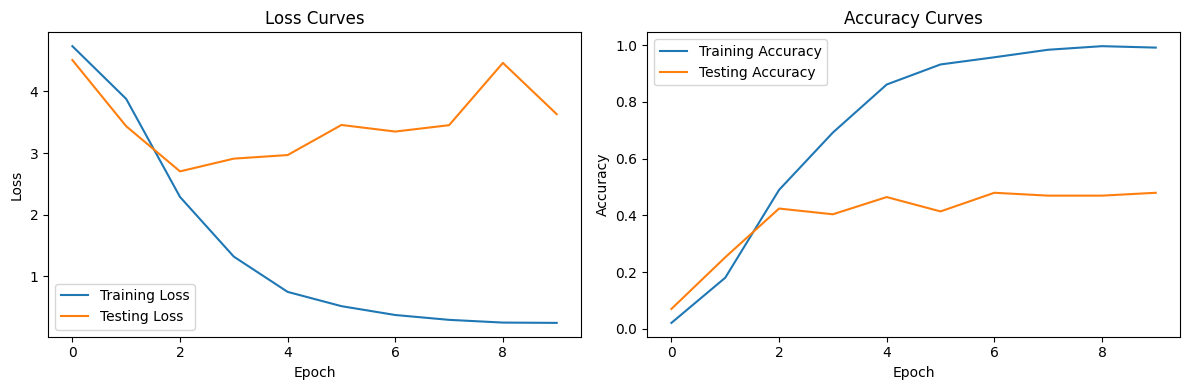

In [165]:
evaluation(history1)

Training Loss: 0.2062409669160843
Testing Loss: 3.8997669219970703
Training Accuracy: 1.0
Testing Accuracy: 0.5050504803657532


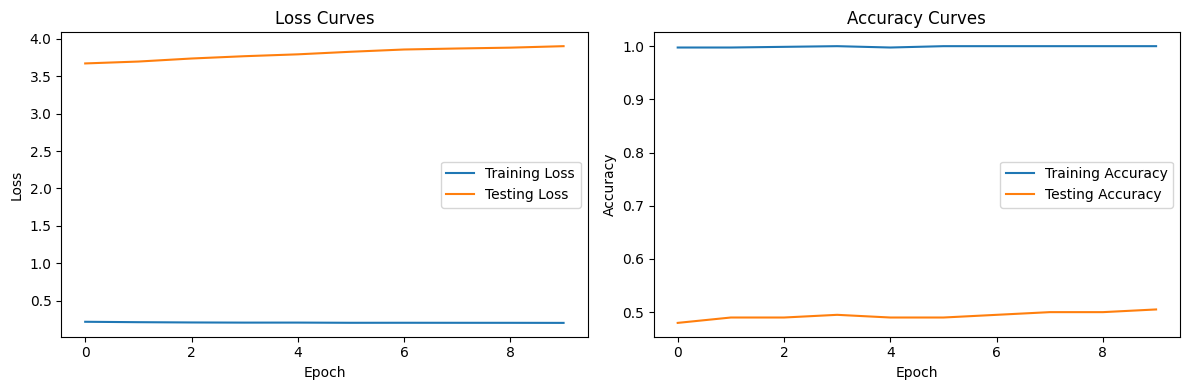

In [166]:
evaluation(history2)

Training Loss: 0.19052210450172424
Testing Loss: 3.000070571899414
Training Accuracy: 0.9962121248245239
Testing Accuracy: 0.5101010203361511


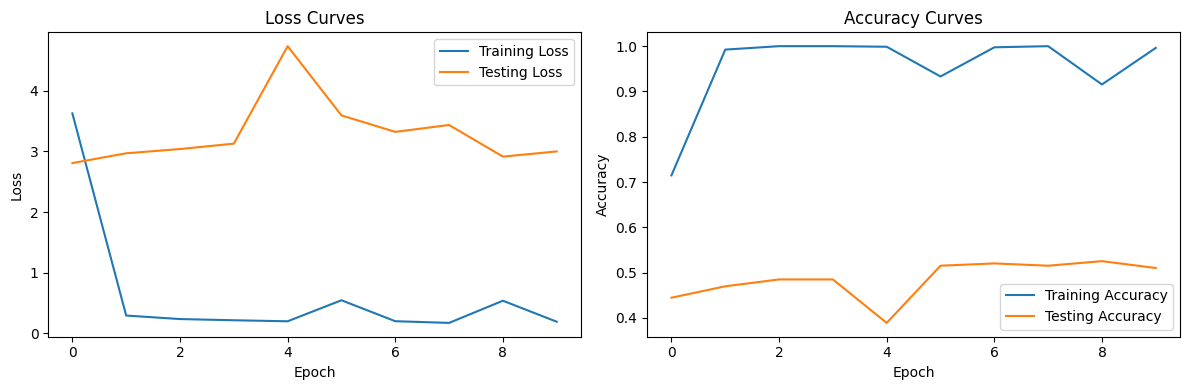

In [167]:
evaluation(history3)

# Analyze the Hyperparameters

## Batch Size

In [171]:
batch_size2 = 16
batch_size3 = 32
batch_size4 = 64

In [168]:
from keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='./logs/batch_size/16')
cnn_model = create_cnn_model() 
print(f"\nTesting Batch Size: {batch_size2}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, callbacks=[tensorboard_callback], epochs=10, batch_size=batch_size2)



Testing Batch Size: 16

Epoch 1/10
50/50 [==============================] - 28s 534ms/step - loss: 4.3887 - accuracy: 0.0758 - val_loss: 3.5704 - val_accuracy: 0.2121
Epoch 2/10
50/50 [==============================] - 25s 501ms/step - loss: 2.2157 - accuracy: 0.5189 - val_loss: 2.6863 - val_accuracy: 0.4444
Epoch 3/10
50/50 [==============================] - 25s 497ms/step - loss: 1.1153 - accuracy: 0.7652 - val_loss: 2.5877 - val_accuracy: 0.4697
Epoch 4/10
50/50 [==============================] - 25s 507ms/step - loss: 0.6124 - accuracy: 0.9217 - val_loss: 2.7687 - val_accuracy: 0.4899
Epoch 5/10
50/50 [==============================] - 27s 541ms/step - loss: 0.5106 - accuracy: 0.9558 - val_loss: 2.9902 - val_accuracy: 0.4495
Epoch 6/10
50/50 [==============================] - 25s 500ms/step - loss: 0.4926 - accuracy: 0.9621 - val_loss: 3.5318 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 24s 482ms/step - loss: 0.5523 - accuracy: 0.9609 - val_loss: 2.56

In [169]:
tensorboard_callback = TensorBoard(log_dir='./logs/batch_size/32')

cnn_model = create_cnn_model()
print(f"\nTesting Batch Size: {batch_size3}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded,callbacks=[tensorboard_callback], epochs=10, batch_size=batch_size3)



Testing Batch Size: 32

Epoch 1/10
25/25 [==============================] - 28s 1s/step - loss: 4.6009 - accuracy: 0.0391 - val_loss: 4.1096 - val_accuracy: 0.1162
Epoch 2/10
25/25 [==============================] - 26s 1s/step - loss: 2.9679 - accuracy: 0.3346 - val_loss: 2.8763 - val_accuracy: 0.3333
Epoch 3/10
25/25 [==============================] - 26s 1s/step - loss: 1.4673 - accuracy: 0.6768 - val_loss: 2.9205 - val_accuracy: 0.4192
Epoch 4/10
25/25 [==============================] - 27s 1s/step - loss: 0.7863 - accuracy: 0.8371 - val_loss: 3.0801 - val_accuracy: 0.4545
Epoch 5/10
25/25 [==============================] - 25s 1s/step - loss: 0.4932 - accuracy: 0.9381 - val_loss: 3.3674 - val_accuracy: 0.4495
Epoch 6/10
25/25 [==============================] - 24s 973ms/step - loss: 0.3923 - accuracy: 0.9646 - val_loss: 3.8984 - val_accuracy: 0.4747
Epoch 7/10
25/25 [==============================] - 24s 947ms/step - loss: 0.3692 - accuracy: 0.9735 - val_loss: 3.3520 - val_accura

In [172]:
tensorboard_callback = TensorBoard(log_dir='./logs/batch_size/64')

cnn_model = create_cnn_model()
print(f"\nTesting Batch Size: {batch_size4}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded,callbacks=[tensorboard_callback], epochs=10, batch_size=batch_size4)



Testing Batch Size: 64

Epoch 1/10
13/13 [==============================] - 28s 2s/step - loss: 4.7722 - accuracy: 0.0303 - val_loss: 4.6074 - val_accuracy: 0.0960
Epoch 2/10
13/13 [==============================] - 24s 2s/step - loss: 4.1035 - accuracy: 0.1667 - val_loss: 3.7034 - val_accuracy: 0.1818
Epoch 3/10
13/13 [==============================] - 24s 2s/step - loss: 2.4084 - accuracy: 0.4861 - val_loss: 2.9636 - val_accuracy: 0.3636
Epoch 4/10
13/13 [==============================] - 25s 2s/step - loss: 1.2868 - accuracy: 0.7083 - val_loss: 2.6362 - val_accuracy: 0.4697
Epoch 5/10
13/13 [==============================] - 26s 2s/step - loss: 0.7151 - accuracy: 0.8624 - val_loss: 2.9186 - val_accuracy: 0.4798
Epoch 6/10
13/13 [==============================] - 25s 2s/step - loss: 0.4175 - accuracy: 0.9432 - val_loss: 3.3800 - val_accuracy: 0.4545
Epoch 7/10
13/13 [==============================] - 23s 2s/step - loss: 0.3173 - accuracy: 0.9747 - val_loss: 3.6035 - val_accuracy: 0.

## Number of layers

In [149]:
num_layer = 2 
num_layer2 = 4
num_layer3 = 6

In [173]:
tensorboard_callback = TensorBoard(log_dir='./logs/num_layer/2')

cnn_model = create_cnn_model(num_layers = num_layer)
print(f"\nTesting Num Layers: {num_layer}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, callbacks=[tensorboard_callback], epochs=10, num_layers=num_layer)



Testing Num Layers: 2

Epoch 1/10
13/13 [==============================] - 32s 2s/step - loss: 4.9112 - accuracy: 0.0240 - val_loss: 4.6743 - val_accuracy: 0.0657
Epoch 2/10
13/13 [==============================] - 30s 2s/step - loss: 4.2048 - accuracy: 0.1389 - val_loss: 4.2421 - val_accuracy: 0.1313
Epoch 3/10
13/13 [==============================] - 27s 2s/step - loss: 2.7875 - accuracy: 0.4571 - val_loss: 3.5600 - val_accuracy: 0.2677
Epoch 4/10
13/13 [==============================] - 26s 2s/step - loss: 1.4455 - accuracy: 0.7828 - val_loss: 3.3559 - val_accuracy: 0.3687
Epoch 5/10
13/13 [==============================] - 27s 2s/step - loss: 0.7889 - accuracy: 0.9508 - val_loss: 3.4140 - val_accuracy: 0.3586
Epoch 6/10
13/13 [==============================] - 26s 2s/step - loss: 0.5882 - accuracy: 0.9949 - val_loss: 3.4640 - val_accuracy: 0.3535
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 0.5093 - accuracy: 0.9949 - val_loss: 3.0678 - val_accuracy: 0.4

In [174]:
tensorboard_callback = TensorBoard(log_dir='./logs/num_layer/4')

cnn_model = create_cnn_model(num_layers = num_layer2)
print(f"\nTesting Num layer: {num_layer2}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, num_layers=num_layer2, callbacks=[tensorboard_callback], epochs=10)



Testing Num layer: 4

Epoch 1/10
13/13 [==============================] - 26s 2s/step - loss: 4.7506 - accuracy: 0.0101 - val_loss: 4.6579 - val_accuracy: 0.0404
Epoch 2/10
13/13 [==============================] - 23s 2s/step - loss: 4.3231 - accuracy: 0.0947 - val_loss: 3.9636 - val_accuracy: 0.1717
Epoch 3/10
13/13 [==============================] - 23s 2s/step - loss: 3.2715 - accuracy: 0.2854 - val_loss: 3.3271 - val_accuracy: 0.2374
Epoch 4/10
13/13 [==============================] - 23s 2s/step - loss: 2.3703 - accuracy: 0.4495 - val_loss: 2.6296 - val_accuracy: 0.3636
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 1.5159 - accuracy: 0.6174 - val_loss: 2.2867 - val_accuracy: 0.4646
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 1.0121 - accuracy: 0.7449 - val_loss: 2.1771 - val_accuracy: 0.4495
Epoch 7/10
13/13 [==============================] - 23s 2s/step - loss: 0.6955 - accuracy: 0.8396 - val_loss: 2.5510 - val_accuracy: 0.52

In [175]:
tensorboard_callback = TensorBoard(log_dir='./logs/num_layer/6')

cnn_model = create_cnn_model(num_layers = num_layer3)
print(f"\nTesting Num layer: {num_layer3}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, num_layers=num_layer3, callbacks=[tensorboard_callback], epochs=10)



Testing Num layer: 6

Epoch 1/10
13/13 [==============================] - 25s 2s/step - loss: 4.7306 - accuracy: 0.0076 - val_loss: 4.7147 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 22s 2s/step - loss: 4.6978 - accuracy: 0.0076 - val_loss: 4.7003 - val_accuracy: 0.0051
Epoch 3/10
13/13 [==============================] - 22s 2s/step - loss: 4.6693 - accuracy: 0.0152 - val_loss: 4.6669 - val_accuracy: 0.0101
Epoch 4/10
13/13 [==============================] - 22s 2s/step - loss: 4.5540 - accuracy: 0.0215 - val_loss: 4.5211 - val_accuracy: 0.0505
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 4.3047 - accuracy: 0.0556 - val_loss: 4.1141 - val_accuracy: 0.0404
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 3.9508 - accuracy: 0.1061 - val_loss: 3.7436 - val_accuracy: 0.1263
Epoch 7/10
13/13 [==============================] - 22s 2s/step - loss: 3.5959 - accuracy: 0.1730 - val_loss: 3.1872 - val_accuracy: 

## Dropout

In [116]:
dropout = 0.25
dropout2 = 0.5
dropout3 = 0.75

In [177]:
tensorboard_callback = TensorBoard(log_dir='./logs/dropout/0.25')

cnn_model = create_cnn_model(dropout_rate = dropout) 
print(f"\nTesting Dropout: {dropout}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, dropout_rate=dropout, callbacks=[tensorboard_callback], epochs=10)



Testing Dropout: 0.25

Epoch 1/10
13/13 [==============================] - 30s 2s/step - loss: 4.7634 - accuracy: 0.0177 - val_loss: 4.6271 - val_accuracy: 0.0303
Epoch 2/10
13/13 [==============================] - 24s 2s/step - loss: 4.1242 - accuracy: 0.1376 - val_loss: 3.6686 - val_accuracy: 0.1970
Epoch 3/10
13/13 [==============================] - 24s 2s/step - loss: 2.3293 - accuracy: 0.4735 - val_loss: 2.9980 - val_accuracy: 0.3687
Epoch 4/10
13/13 [==============================] - 23s 2s/step - loss: 1.1223 - accuracy: 0.7551 - val_loss: 2.7483 - val_accuracy: 0.4293
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 0.6177 - accuracy: 0.8876 - val_loss: 2.7413 - val_accuracy: 0.4899
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 0.3968 - accuracy: 0.9444 - val_loss: 3.1522 - val_accuracy: 0.4646
Epoch 7/10
13/13 [==============================] - 23s 2s/step - loss: 0.2846 - accuracy: 0.9874 - val_loss: 3.3881 - val_accuracy: 0.4

In [178]:
tensorboard_callback = TensorBoard(log_dir='./logs/dropout/0.5')

cnn_model = create_cnn_model(dropout_rate = dropout2)
print(f"\nTesting Dropout: {dropout2}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, dropout_rate=dropout2, callbacks=[tensorboard_callback], epochs=10)



Testing Dropout: 0.5

Epoch 1/10
13/13 [==============================] - 26s 2s/step - loss: 4.7252 - accuracy: 0.0391 - val_loss: 4.4860 - val_accuracy: 0.1162
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 3.7654 - accuracy: 0.2412 - val_loss: 3.1504 - val_accuracy: 0.3434
Epoch 3/10
13/13 [==============================] - 22s 2s/step - loss: 2.1372 - accuracy: 0.5391 - val_loss: 2.5891 - val_accuracy: 0.3838
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 1.1006 - accuracy: 0.7664 - val_loss: 2.6239 - val_accuracy: 0.5000
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 0.6658 - accuracy: 0.8750 - val_loss: 2.6191 - val_accuracy: 0.4747
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 0.4630 - accuracy: 0.9369 - val_loss: 2.9699 - val_accuracy: 0.5051
Epoch 7/10
13/13 [==============================] - 23s 2s/step - loss: 0.4168 - accuracy: 0.9596 - val_loss: 2.9498 - val_accuracy: 0.51

In [179]:
tensorboard_callback = TensorBoard(log_dir='./logs/dropout/0.75')

cnn_model = create_cnn_model(dropout_rate = dropout3)  
print(f"\nTesting Dropout: {dropout3}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, dropout_rate=dropout3, callbacks=[tensorboard_callback], epochs=10)



Testing Dropout: 0.75

Epoch 1/10
13/13 [==============================] - 28s 2s/step - loss: 4.7593 - accuracy: 0.0253 - val_loss: 4.6719 - val_accuracy: 0.0556
Epoch 2/10
13/13 [==============================] - 24s 2s/step - loss: 4.2838 - accuracy: 0.1641 - val_loss: 3.7599 - val_accuracy: 0.1616
Epoch 3/10
13/13 [==============================] - 24s 2s/step - loss: 2.7124 - accuracy: 0.4242 - val_loss: 2.6831 - val_accuracy: 0.4040
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 1.4966 - accuracy: 0.6540 - val_loss: 2.3667 - val_accuracy: 0.4596
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 0.9265 - accuracy: 0.8131 - val_loss: 2.6910 - val_accuracy: 0.5051
Epoch 6/10
13/13 [==============================] - 24s 2s/step - loss: 0.7426 - accuracy: 0.8662 - val_loss: 2.5137 - val_accuracy: 0.4899
Epoch 7/10
13/13 [==============================] - 23s 2s/step - loss: 0.5695 - accuracy: 0.9205 - val_loss: 2.6373 - val_accuracy: 0.5

## Optimizer

In [182]:
optimizer_sgd= 'SGD'
optimizer_adam= 'Adam'
optimizer_rms= 'RMSProp'

In [183]:
tensorboard_callback = TensorBoard(log_dir='./logs/optimizer/sgd')

cnn_model = create_cnn_model()
print(f"\nTesting optimizer: {optimizer_sgd}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, optimizer_name=optimizer_sgd, callbacks=[tensorboard_callback], epochs=10)



Testing optimizer: SGD

Epoch 1/10
13/13 [==============================] - 37s 2s/step - loss: 4.7994 - accuracy: 0.0063 - val_loss: 4.7961 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 4.7974 - accuracy: 0.0088 - val_loss: 4.7955 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 23s 2s/step - loss: 4.7940 - accuracy: 0.0227 - val_loss: 4.7956 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 23s 2s/step - loss: 4.7918 - accuracy: 0.0189 - val_loss: 4.7957 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 4.7919 - accuracy: 0.0164 - val_loss: 4.7955 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 4.7875 - accuracy: 0.0189 - val_loss: 4.7953 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 24s 2s/step - loss: 4.7903 - accuracy: 0.0152 - val_loss: 4

In [184]:
tensorboard_callback = TensorBoard(log_dir='./logs/optimizer/adam')

cnn_model = create_cnn_model()
print(f"\nTesting optimizer: {optimizer_adam}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, optimizer_name=optimizer_adam,callbacks=[tensorboard_callback], epochs=10)



Testing optimizer: Adam

Epoch 1/10
13/13 [==============================] - 29s 2s/step - loss: 4.8270 - accuracy: 0.0177 - val_loss: 4.7310 - val_accuracy: 0.0101
Epoch 2/10
13/13 [==============================] - 27s 2s/step - loss: 4.4863 - accuracy: 0.0707 - val_loss: 4.3053 - val_accuracy: 0.0808
Epoch 3/10
13/13 [==============================] - 24s 2s/step - loss: 3.3242 - accuracy: 0.2753 - val_loss: 3.4427 - val_accuracy: 0.3081
Epoch 4/10
13/13 [==============================] - 25s 2s/step - loss: 1.8419 - accuracy: 0.5631 - val_loss: 2.8561 - val_accuracy: 0.4091
Epoch 5/10
13/13 [==============================] - 28s 2s/step - loss: 1.0032 - accuracy: 0.7765 - val_loss: 2.9568 - val_accuracy: 0.4646
Epoch 6/10
13/13 [==============================] - 25s 2s/step - loss: 0.6030 - accuracy: 0.8864 - val_loss: 2.9118 - val_accuracy: 0.4747
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 0.4149 - accuracy: 0.9495 - val_loss: 3.3446 - val_accuracy: 0

In [185]:
tensorboard_callback = TensorBoard(log_dir='./logs/optimizer/rms')

cnn_model = create_cnn_model() 
print(f"\nTesting optimizer: {optimizer_rms}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, optimizer_name=optimizer_rms, callbacks=[tensorboard_callback], epochs=10)



Testing optimizer: RMSProp

Epoch 1/10
13/13 [==============================] - 28s 2s/step - loss: 4.9244 - accuracy: 0.0139 - val_loss: 4.7592 - val_accuracy: 0.0303
Epoch 2/10
13/13 [==============================] - 26s 2s/step - loss: 4.6661 - accuracy: 0.0429 - val_loss: 4.6893 - val_accuracy: 0.0556
Epoch 3/10
13/13 [==============================] - 25s 2s/step - loss: 4.3069 - accuracy: 0.1086 - val_loss: 4.2313 - val_accuracy: 0.0657
Epoch 4/10
13/13 [==============================] - 25s 2s/step - loss: 3.2889 - accuracy: 0.2955 - val_loss: 4.1170 - val_accuracy: 0.2222
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 2.1140 - accuracy: 0.5152 - val_loss: 3.2517 - val_accuracy: 0.3535
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 1.3792 - accuracy: 0.6755 - val_loss: 3.3150 - val_accuracy: 0.4040
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 0.8345 - accuracy: 0.8258 - val_loss: 3.8636 - val_accuracy

## Regularization

In [186]:
reg1 = 0.0001
reg2 = 0.001
reg3 = 0.01

In [187]:
tensorboard_callback = TensorBoard(log_dir='./logs/regularization/pw4')

cnn_model = create_cnn_model(regularization_factor=reg1) 
print(f"\nTesting Reg factor: {reg1}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, regularization_factor=reg1, callbacks=[tensorboard_callback], epochs=10)



Testing Reg factor: 0.0001

Epoch 1/10
13/13 [==============================] - 34s 2s/step - loss: 4.6450 - accuracy: 0.0202 - val_loss: 4.5057 - val_accuracy: 0.0354
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 4.1440 - accuracy: 0.1086 - val_loss: 3.7331 - val_accuracy: 0.1616
Epoch 3/10
13/13 [==============================] - 26s 2s/step - loss: 2.6406 - accuracy: 0.4078 - val_loss: 2.7495 - val_accuracy: 0.3687
Epoch 4/10
13/13 [==============================] - 22s 2s/step - loss: 1.4002 - accuracy: 0.6654 - val_loss: 2.3667 - val_accuracy: 0.4394
Epoch 5/10
13/13 [==============================] - 25s 2s/step - loss: 0.6982 - accuracy: 0.8321 - val_loss: 2.7065 - val_accuracy: 0.4394
Epoch 6/10
13/13 [==============================] - 24s 2s/step - loss: 0.3591 - accuracy: 0.9078 - val_loss: 3.4333 - val_accuracy: 0.4697
Epoch 7/10
13/13 [==============================] - 21s 2s/step - loss: 0.1784 - accuracy: 0.9583 - val_loss: 2.8384 - val_accuracy

In [188]:
tensorboard_callback = TensorBoard(log_dir='./logs/regularization/pw3')

cnn_model = create_cnn_model(regularization_factor=reg2) 
print(f"\nTesting Reg factor: {reg2}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, regularization_factor=reg2, callbacks=[tensorboard_callback], epochs=10)



Testing Reg factor: 0.001

Epoch 1/10
13/13 [==============================] - 30s 2s/step - loss: 4.7841 - accuracy: 0.0290 - val_loss: 4.6825 - val_accuracy: 0.0404
Epoch 2/10
13/13 [==============================] - 26s 2s/step - loss: 4.3594 - accuracy: 0.1086 - val_loss: 4.2076 - val_accuracy: 0.1162
Epoch 3/10
13/13 [==============================] - 26s 2s/step - loss: 3.0677 - accuracy: 0.3106 - val_loss: 3.0738 - val_accuracy: 0.3081
Epoch 4/10
13/13 [==============================] - 26s 2s/step - loss: 1.6604 - accuracy: 0.6313 - val_loss: 2.6848 - val_accuracy: 0.4242
Epoch 5/10
13/13 [==============================] - 27s 2s/step - loss: 0.9095 - accuracy: 0.8081 - val_loss: 2.8988 - val_accuracy: 0.4293
Epoch 6/10
13/13 [==============================] - 30s 2s/step - loss: 0.6217 - accuracy: 0.8813 - val_loss: 2.6241 - val_accuracy: 0.4596
Epoch 7/10
13/13 [==============================] - 27s 2s/step - loss: 0.4222 - accuracy: 0.9444 - val_loss: 3.1087 - val_accuracy:

In [189]:
tensorboard_callback = TensorBoard(log_dir='./logs/regularization/pw2')

cnn_model = create_cnn_model(regularization_factor=reg3) 
print(f"\nTesting Reg factor: {reg3}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, regularization_factor=reg3, callbacks=[tensorboard_callback], epochs=10)



Testing Reg factor: 0.01

Epoch 1/10
13/13 [==============================] - 28s 2s/step - loss: 5.6285 - accuracy: 0.0164 - val_loss: 5.0359 - val_accuracy: 0.0253
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 4.8144 - accuracy: 0.0404 - val_loss: 4.5550 - val_accuracy: 0.1111
Epoch 3/10
13/13 [==============================] - 23s 2s/step - loss: 3.8539 - accuracy: 0.2260 - val_loss: 3.9036 - val_accuracy: 0.2323
Epoch 4/10
13/13 [==============================] - 23s 2s/step - loss: 2.6416 - accuracy: 0.4987 - val_loss: 3.6073 - val_accuracy: 0.3333
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 1.8605 - accuracy: 0.7159 - val_loss: 3.7540 - val_accuracy: 0.4545
Epoch 6/10
13/13 [==============================] - 23s 2s/step - loss: 1.4833 - accuracy: 0.8232 - val_loss: 3.5712 - val_accuracy: 0.4091
Epoch 7/10
13/13 [==============================] - 23s 2s/step - loss: 1.2232 - accuracy: 0.8952 - val_loss: 3.7306 - val_accuracy: 

## Learning rate

In [190]:
lr1 = 0.0001
lr2 = 0.001
lr3 = 0.01

In [191]:
tensorboard_callback = TensorBoard(log_dir='./logs/learning_rate/pw4')

cnn_model = create_cnn_model() 
print(f"\nTesting Learning rate: {lr1}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, learning_rate=lr1, callbacks=[tensorboard_callback], epochs=10)



Testing Learning rate: 0.0001

Epoch 1/10
13/13 [==============================] - 29s 2s/step - loss: 4.7843 - accuracy: 0.0139 - val_loss: 4.7413 - val_accuracy: 0.0202
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 4.6669 - accuracy: 0.0593 - val_loss: 4.6373 - val_accuracy: 0.0505
Epoch 3/10
13/13 [==============================] - 23s 2s/step - loss: 4.5096 - accuracy: 0.0770 - val_loss: 4.4845 - val_accuracy: 0.0556
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 4.2655 - accuracy: 0.1452 - val_loss: 4.2393 - val_accuracy: 0.1364
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 3.8696 - accuracy: 0.2235 - val_loss: 4.0211 - val_accuracy: 0.1364
Epoch 6/10
13/13 [==============================] - 24s 2s/step - loss: 3.4065 - accuracy: 0.2778 - val_loss: 3.5882 - val_accuracy: 0.2172
Epoch 7/10
13/13 [==============================] - 24s 2s/step - loss: 2.9387 - accuracy: 0.3674 - val_loss: 3.4044 - val_accur

In [192]:
tensorboard_callback = TensorBoard(log_dir='./logs/learning_rate/pw3')

cnn_model = create_cnn_model() 
print(f"\nTesting Learning rate: {lr2}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, learning_rate=lr2, callbacks=[tensorboard_callback], epochs=10)



Testing Learning rate: 0.001

Epoch 1/10
13/13 [==============================] - 28s 2s/step - loss: 4.7327 - accuracy: 0.0202 - val_loss: 4.5762 - val_accuracy: 0.0606
Epoch 2/10
13/13 [==============================] - 23s 2s/step - loss: 4.0045 - accuracy: 0.1641 - val_loss: 3.6528 - val_accuracy: 0.2121
Epoch 3/10
13/13 [==============================] - 23s 2s/step - loss: 2.4007 - accuracy: 0.4545 - val_loss: 2.6547 - val_accuracy: 0.4141
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 1.2473 - accuracy: 0.7285 - val_loss: 2.5616 - val_accuracy: 0.4495
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 0.7204 - accuracy: 0.8472 - val_loss: 3.0586 - val_accuracy: 0.4444
Epoch 6/10
13/13 [==============================] - 25s 2s/step - loss: 0.4497 - accuracy: 0.9394 - val_loss: 3.2645 - val_accuracy: 0.4444
Epoch 7/10
13/13 [==============================] - 23s 2s/step - loss: 0.3592 - accuracy: 0.9710 - val_loss: 2.8731 - val_accura

In [193]:
tensorboard_callback = TensorBoard(log_dir='./logs/learning_rate/pw2')

cnn_model = create_cnn_model() 
print(f"\nTesting Learning rate: {lr3}\n")
history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded, learning_rate=lr3, callbacks=[tensorboard_callback], epochs=10)



Testing Learning rate: 0.01

Epoch 1/10
13/13 [==============================] - 28s 2s/step - loss: 7.5415 - accuracy: 0.0063 - val_loss: 7.0679 - val_accuracy: 0.0051
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 6.7521 - accuracy: 0.0038 - val_loss: 6.3476 - val_accuracy: 0.0051
Epoch 3/10
13/13 [==============================] - 25s 2s/step - loss: 6.0451 - accuracy: 0.0101 - val_loss: 5.7605 - val_accuracy: 0.0051
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 5.5453 - accuracy: 0.0126 - val_loss: 5.3811 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 24s 2s/step - loss: 5.2258 - accuracy: 0.0126 - val_loss: 5.1432 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 25s 2s/step - loss: 5.0233 - accuracy: 0.0126 - val_loss: 4.9921 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 4.8918 - accuracy: 0.0126 - val_loss: 4.8945 -

## Learning rate scheduler

In [9]:
import math
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, Callback
epoch1 = 10
epoch2 = 20
#epoch3 = 5

In [76]:
import os
from keras.utils import to_categorical

y_train_encoded1 = to_categorical(y_train_encoded)
y_test_encoded1 = to_categorical(y_test_encoded)

"""
 converts them into a one-hot encoded representation. 
 One-hot encoding is a way of representing categorical variables,
 where each class is represented by a binary vector. 
 The vector is all zeros except for the index that corresponds to the class, which is set to 1.
"""

def step_decay_schedule(initial_lr = 0.001, decay_factor = 0.0001,epoch = 10, epoch_drop = 10):
    return initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / epoch_drop))

"""
epoch_drop: This parameter represents the number of epochs after which the learning rate will be adjusted. 
Specifically, after every epoch_drop number of epochs, the learning rate will be multiplied by the decay_factor.
"""

tensorboard_callback = TensorBoard(log_dir = './logs/learning_schedueler/10steps')

def train_cnn_with_params(learning_rate, epochs):
    cnn_model = create_cnn_model()
    print(f"\nTesting Step Learning rate Schedueler 0.001 for: {epoch1}\n")

    lr_scheduler_callback = LearningRateScheduler(lambda epoch, lr: step_decay_schedule(initial_lr = 0.001, decay_factor = 0.0001,epoch = epoch1, epoch_drop = 2))

    cnn_model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model
    history = cnn_model.fit(X_train_images, y_train_encoded1, 
                            validation_data=(X_test_images, y_test_encoded1),
                            epochs=epochs, callbacks=[tensorboard_callback, lr_scheduler_callback])


train_cnn_with_params(learning_rate=0.001, epochs=epoch1)

# cnn_model = create_cnn_model() 
# print(f"\nTesting Step Learning rate Schedueler 0.001 for: {epoch1}\n")
# cnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# history = train_cnn_model(cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded,
#                           callbacks=[tensorboard_callback],
#                           epochs=epoch1,
#                           lr_schedule=lambda epoch: step_decay_schedule(epoch=epoch1)
#                           )


# history = cnn_model.fit(X_train_images, 
#                         y_train_encoded, 
#                         validation_data=(X_test_images, y_test_encoded), 
#                         callbacks=[tensorboard_callback, StepDecayCallback(epoch=epoch1)], 
#                         epochs=epoch1)



Testing Step Learning rate Schedueler 0.001 for: 10

Epoch 1/10
25/25 [==============================] - 26s 989ms/step - loss: 4.7966 - accuracy: 0.0152 - val_loss: 4.7928 - val_accuracy: 0.0253 - lr: 1.0000e-23
Epoch 2/10
25/25 [==============================] - 23s 938ms/step - loss: 4.7964 - accuracy: 0.0114 - val_loss: 4.7928 - val_accuracy: 0.0253 - lr: 1.0000e-23
Epoch 3/10
25/25 [==============================] - 23s 926ms/step - loss: 4.7970 - accuracy: 0.0126 - val_loss: 4.7928 - val_accuracy: 0.0253 - lr: 1.0000e-23
Epoch 4/10
25/25 [==============================] - 23s 934ms/step - loss: 4.7997 - accuracy: 0.0101 - val_loss: 4.7928 - val_accuracy: 0.0253 - lr: 1.0000e-23
Epoch 5/10
25/25 [==============================] - 24s 944ms/step - loss: 4.7991 - accuracy: 0.0101 - val_loss: 4.7928 - val_accuracy: 0.0253 - lr: 1.0000e-23
Epoch 6/10
25/25 [==============================] - 23s 940ms/step - loss: 4.7989 - accuracy: 0.0051 - val_loss: 4.7928 - val_accuracy: 0.0253 - l

In [7]:
def exp_decay_schedule(initial_lr = 0.001, decay_factor = 0.0001,epoch = 10, epoch_drop = 10):
    return initial_lr * math.exp(-decay_factor * epoch)

In [78]:
y_train_encoded2 = to_categorical(y_train_encoded)
y_test_encoded2 = to_categorical(y_test_encoded)


def exp_decay_schedule(initial_lr = 0.001, decay_factor = 0.0001,epoch = 10, epoch_drop = 10):
    return initial_lr * math.exp(-decay_factor * epoch)
    

tensorboard_callback = TensorBoard(log_dir = './logs/learning_schedueler/10exp')

def train_cnn_with_params(learning_rate, epochs):
    cnn_model = create_cnn_model()
    print(f"\nTesting Exponential Learning rate Schedueler 0.001 for: {epoch1}\n")

    lr_scheduler_callback = LearningRateScheduler(lambda epoch, lr: exp_decay_schedule(initial_lr = 0.001, decay_factor = 0.0001,epoch = epoch1, epoch_drop = 2))

    cnn_model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model
    history = cnn_model.fit(X_train_images, y_train_encoded2, 
                            validation_data=(X_test_images, y_test_encoded2),
                            epochs=epochs, callbacks=[tensorboard_callback, lr_scheduler_callback])


train_cnn_with_params(learning_rate=0.001, epochs=epoch1)


Testing Exponential Learning rate Schedueler 0.001 for: 10

Epoch 1/10
25/25 [==============================] - 28s 1s/step - loss: 4.6946 - accuracy: 0.0341 - val_loss: 4.4625 - val_accuracy: 0.0909 - lr: 9.9900e-04
Epoch 2/10
25/25 [==============================] - 25s 1s/step - loss: 3.3868 - accuracy: 0.2677 - val_loss: 3.1901 - val_accuracy: 0.3333 - lr: 9.9900e-04
Epoch 3/10
25/25 [==============================] - 27s 1s/step - loss: 1.5731 - accuracy: 0.6414 - val_loss: 2.7417 - val_accuracy: 0.4040 - lr: 9.9900e-04
Epoch 4/10
25/25 [==============================] - 26s 1s/step - loss: 0.7838 - accuracy: 0.8422 - val_loss: 2.7559 - val_accuracy: 0.4899 - lr: 9.9900e-04
Epoch 5/10
25/25 [==============================] - 28s 1s/step - loss: 0.4809 - accuracy: 0.9242 - val_loss: 3.0229 - val_accuracy: 0.4444 - lr: 9.9900e-04
Epoch 6/10
25/25 [==============================] - 28s 1s/step - loss: 0.3840 - accuracy: 0.9609 - val_loss: 3.3299 - val_accuracy: 0.4495 - lr: 9.9900e-

# Collect the Optimal Hyperparameters

In [32]:
op_learning_rate = 0.001
op_epoch = 10
op_optimizer = 'Adam'
op_batch_size = 32
op_num_layers = 4
op_dropout = 0.75
op_regularization = 0.01
op_lr_schedule = exp_decay_schedule(initial_lr = 0.001, decay_factor = 0.01,epoch = epoch1, epoch_drop = 2)

## Use the Evaluation function

In [33]:
op_cnn_model = create_cnn_model(num_layers=op_num_layers,dropout_rate=op_dropout,regularization_factor=op_regularization)

In [34]:
op_model, op_history = train_cnn_model(op_cnn_model, X_train_images, y_train_encoded, X_test_images, y_test_encoded,
                             num_layers=op_num_layers, dropout_rate=op_dropout, regularization_factor=op_regularization,
                             batch_size=op_batch_size, learning_rate=op_learning_rate, optimizer_name=op_optimizer,
                             lr_schedule=lambda epoch, lr: op_lr_schedule)


Epoch 1: LearningRateScheduler setting learning rate to 0.0009048374180359595.
Epoch 1/10
25/25 [==============================] - 25s 931ms/step - loss: 5.5930 - accuracy: 0.0076 - val_loss: 4.9925 - val_accuracy: 0.0303 - lr: 9.0484e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009048374180359595.
Epoch 2/10
25/25 [==============================] - 22s 877ms/step - loss: 4.8202 - accuracy: 0.0227 - val_loss: 4.6601 - val_accuracy: 0.0404 - lr: 9.0484e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009048374180359595.
Epoch 3/10
25/25 [==============================] - 22s 893ms/step - loss: 4.2057 - accuracy: 0.1288 - val_loss: 3.7047 - val_accuracy: 0.2626 - lr: 9.0484e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009048374180359595.
Epoch 4/10
25/25 [==============================] - 21s 855ms/step - loss: 3.1255 - accuracy: 0.3447 - val_loss: 2.9529 - val_accuracy: 0.3889 - lr: 9.0484e-04

Epoch 5: LearningRateScheduler setting 

Training Loss: 1.5238280296325684
Testing Loss: 2.408975601196289
Training Accuracy: 0.8055555820465088
Testing Accuracy: 0.6010100841522217


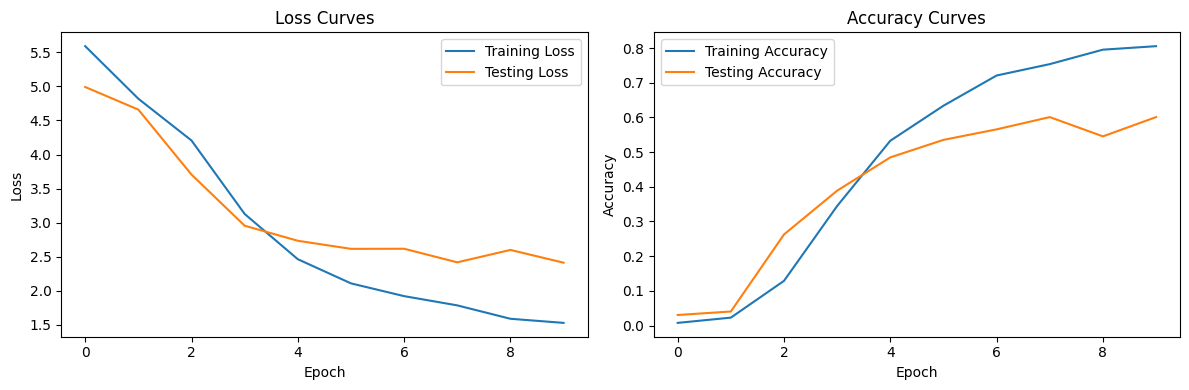

In [35]:
evaluation(op_history)